# Capstone Project Summer Analytics 2020
===============================================================  

### Recall: Stage 01: Observation of Data

In [1]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1.1) Importing Libraries
# ==========================
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.preprocessing import Imputer
# from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split

# 1.2) Loading Training set data
# ================================
df_train = pd.read_csv('train.csv')

##### Dropping all these 4 columns

In [2]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Droping 'Id', 'Behaviour', 'EmployeeNumber' and 'PerformanceRating' columns
df_train.drop(['Id', 'Behaviour', 'EmployeeNumber', 'PerformanceRating'], axis=1, inplace=True)

##### Importing Libraries

In [3]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.preprocessing import Imputer
# from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split

##### 5.1.2) Lable Encoder
Transform non-numeric columns to numerical columns

In [4]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_train3 = df_train.copy()

In [5]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
LE = LabelEncoder()

# Transforming non-numeric columns into numerical columns in Training Data Frame
for column in df_train3.columns:
    if df_train3[column].dtype == object:
        df_train3[column] = LE.fit_transform(df_train3[column])


In [6]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Y = df_train3['Attrition']
X = df_train3.drop(['Attrition'], axis=1)

##### Feature Scaling

In [7]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Feature Scaling
std_sclr = StandardScaler()
X_scale = std_sclr.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

##### Splitting the dataset

In [8]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Splitting the dataset into the Training set and Test set
X_train_scale, X_test_scale, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.25, random_state = 0)

##### Principal Component Analysis

In [9]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)
explained_variance = pca.explained_variance_ratio_

In [10]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
pca_explained_variance = pd.DataFrame(list(explained_variance), columns=['explained_variance'])

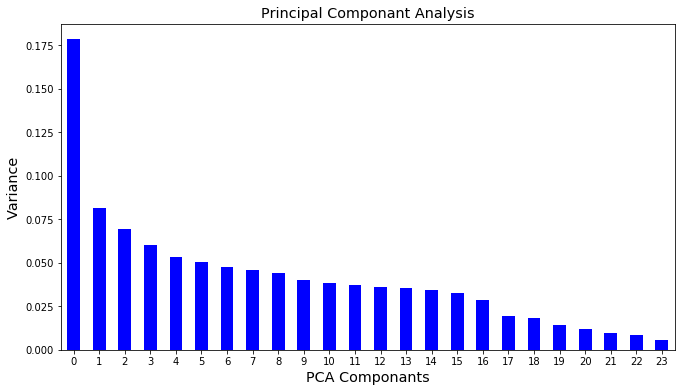

In [11]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

fig = plt.figure(figsize=(11,6))
pca_explained_variance['explained_variance'].plot(kind = 'bar', stacked = True, colormap = 'winter', rot = 0)
plt.xlabel('PCA Componants', fontsize = 'x-large')
plt.ylabel('Variance', fontsize = 'x-large')
plt.title('Principal Componant Analysis', fontsize = 'x-large')
plt.show()

### Stage 06: Applying Machine Learning Algorithms
### ========================================

Since we must predict a binary class, we will be using classification models for training & predicting Employee Attrition. We need to keep in mind that our focus should be to have a better accuracy of predicting attrition i.e. Attrition = 1 which in confusion matrix will be "True Positive". However, we should not forget the prediction accuracy of not qualifying for attrition i.e. Attrition = 0 which will be "True Negative" in confusion matrix.

In this section; Logistic Regression, Decision Tree Classification, Random Forest Classification, K-NN Classification, Support Vector Machine (SVM) Classification, Kernel Support Vector Machine (SVM) Classification, Naïve Bayes Classification, Gradient Boosting Classification, and ADA Boost Classification algorithms are applied to the dataset.

I will apply these algorithms into all features available and also features which explain the 90% of total importance via PCA. I will also try to improve model accuracy via hyperparameter tuning. I have coded four functions to apply to the models throughout this section.

##### Importing Libraries

In [12]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

##### Loading the Data

In [13]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Loading the testing data
df_test_org = pd.read_csv('test.csv')

# Droping the columns which don't effect the target column
df_test = df_test_org.drop(['Id', 'Behaviour', 'EmployeeNumber', 'PerformanceRating'], axis=1)

# Applying Lable encoding
# ===========================

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# Transforming non-numeric columns into numerical columns in Training Data Frame
for column in df_test.columns:
    if df_test[column].dtype == object:
        df_test[column] = LE.fit_transform(df_test[column])

# Applying Feature Scaling
# ===========================
std_sclr = StandardScaler()
df_test_scale = std_sclr.fit_transform(df_test)
df_test_scale = pd.DataFrame(df_test_scale, columns=df_test.columns)


In [14]:
df_test_scale.shape

(470, 24)

In [15]:
# Applying PCA by Extracting 24 features
# ==================================
from sklearn.decomposition import PCA
pca = PCA(n_components = 24)
df_test_pca = pd.DataFrame(pca.fit_transform(df_test_scale))
df_test_pca.columns = df_test_scale.columns

##### Classification Functions for Machine Learning Algorithms

##### Classification Function

In [16]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Creating temporary dataframe for storing ID and ATTRITION values into csv file.
sample_submission = df_test_org[['Id']]

In [17]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Creating data frame to store score values of models
compare_scores = pd.DataFrame(np.full((9,4), 0.0), 
                   index = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier','KNeighborsClassifier','SVM','KernelSVM', 'GaussianNB', 'GradientBoostingClassifier',  'AdaBoostClassifier'], 
                   columns = ['all_features', 'tuned_all_features', 'PCA_features', 'tuned_PCA_features'])

In [18]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def classification_model(X_train_set, X_test_set, df_test_set, Model, Model_string, col, bst_prms):
    
     # TRAINING DATA ======================================================================================================
            # Fitting/Training classifier to the Training data set
    Model.fit(X_train_set, Y_train)
    
    # VALIDATING ======================================================================================================
            # Finding evaluation metric (f1-score), storing it into a data frame ('score') and  Printing. 
    Y_test_set_pred = Model.predict(X_test_set)
    score = f1_score(Y_test, Y_test_set_pred, average = 'weighted')
    compare_scores[col][Model_string] = score
            # Printing the score
    print("f1 score: {}".format(score)) 
          # Printing the Confusion Matrix
    print('Confusion Matrix is:\n', confusion_matrix(Y_test, Y_test_set_pred)) 
    
    # ======================================================================================================
            # Printing Tuned Model Parameters
    if bst_prms == 'YES':
        print("Tuned Model Parameters: {}".format(Model.best_params_))
        
    # CREATING CSV FILE ======================================================================================================
            # Predicting the required testing set and storing into data frame
    df_test_set_pred = Model.predict(df_test_set)
    sample_submission['Attrition_val'] = df_test_set_pred
    
            # Predicting the probabilities for the df_test data and storing into data frame
    df_test_set_pred_prob = Model.predict_proba(df_test_set)
    sample_submission['Attrition_prob_0'] = df_test_set_pred_prob[:, 0]
    sample_submission['Attrition_prob_1'] = df_test_set_pred_prob[:, 1]

            # Exporting Dataframe into csv file
    csv_file_name = 'sample_submission_' + Model_string + '_' + col + '.csv'
    sample_submission.to_csv(csv_file_name, index=False)
    print('CSV file is created successfully')
    # ======================================================================================================


#                                          ===========   =========== Applying Models =========== ===========

### 4.1 - Logistic Regression
##### ===================================================================================================================

##### 4.1.1 - Logistic Regression with all features

In [19]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Function for logistic regression with all features
Model = LogisticRegression(random_state = 0)

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='LogisticRegression', col='all_features', bst_prms='NO')

# Assign f1 score to a variable for the model comparison 
# LR1 = score

f1 score: 0.7420303166024437
Confusion Matrix is:
 [[150  50]
 [ 55 152]]
CSV file is created successfully


##### 4.1.2 - Logistic Regression with Hyperparameter Tuning (all features)

In [20]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Set up parameters
param_grid = {'C': np.arange(1, 1000)}

# Function for hyperparameter tuning to logistic regression with all features
Model = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv=5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='LogisticRegression', col='tuned_all_features', bst_prms='YES')

# Assign f1 score to a variable for the model comparison 
# LR2 = score

f1 score: 0.7420303166024437
Confusion Matrix is:
 [[150  50]
 [ 55 152]]
Tuned Model Parameters: {'C': 1}
CSV file is created successfully


##### 4.1.3 - Logistic Regression with PCA features

In [21]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Function for logistic regression with PCA features
Model = LogisticRegression(random_state = 0)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='LogisticRegression', col='PCA_features', bst_prms='NO')

# Assign f1 score to a variable for the model comparison 
# LR3 = score

f1 score: 0.7420303166024437
Confusion Matrix is:
 [[150  50]
 [ 55 152]]
CSV file is created successfully


##### 4.1.4 - Logistic Regression with Hyperparameter Tuning (PCA features)

In [22]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Set up parameters
param_grid={'C': np.arange(1, 100)}

# Functions for tuning logistic regression with pca features
Model = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 5, scoring = 'f1_weighted')

# Calling the function
score = classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='LogisticRegression',col='tuned_PCA_features', bst_prms='YES')

# Assign f1 score to a variable for the model comparison 
# LR4 = score

f1 score: 0.7420303166024437
Confusion Matrix is:
 [[150  50]
 [ 55 152]]
Tuned Model Parameters: {'C': 1}
CSV file is created successfully


### 4.2 - Decision Tree Classification
##### ===================================================================================================================

##### 4.2.1 - Decision Tree Classification with all features

In [23]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Function for decision tree classification model with all features
Model = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

# Calling the function
score = classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='DecisionTreeClassifier',col='all_features', bst_prms='NO')

# Assign f1 score to a variable for the model comparison
# DTC1 = score

f1 score: 0.9107119907119908
Confusion Matrix is:
 [[164  36]
 [  0 207]]
CSV file is created successfully


##### 4.2.2 - Decision Tree Classification with Hyperparameter Tuning (all features)

In [24]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Function for hyperparameter tuning to decision tree classification with all features
Model = RandomizedSearchCV(DecisionTreeClassifier(criterion = 'gini', random_state = 0), param_dist, cv=5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='DecisionTreeClassifier',col='tuned_all_features', bst_prms='YES')

# Assign f1 score to a variable for the model comparison
# DTC2 = score

f1 score: 0.9182665100226317
Confusion Matrix is:
 [[167  33]
 [  0 207]]
Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 27.0, 'min_samples_leaf': 1}
CSV file is created successfully


##### 4.2.3 - Decision Tree Classification with PCA features

In [25]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Function for decision tree classification with PCA features
Model = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='DecisionTreeClassifier',col='PCA_features', bst_prms='NO')

# Assign f1 score to a variable for the model comparison 
# DTC3 = score

f1 score: 0.9157517041738352
Confusion Matrix is:
 [[166  34]
 [  0 207]]
CSV file is created successfully


##### 4.2.4 - Decision Tree with Hyperparameter Tuning (PCA features)

In [26]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint = True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Functions for tuning decision trees with pca features
Model = RandomizedSearchCV(DecisionTreeClassifier(criterion = 'gini', random_state = 0), param_dist, cv = 5, scoring = 'f1_weighted', random_state = 0)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='DecisionTreeClassifier',col='tuned_PCA_features', bst_prms='YES')

# Assign f1 score to a variable for the model comparison 
# DTC4 = score

f1 score: 0.9357848611859307
Confusion Matrix is:
 [[174  26]
 [  0 207]]
Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 14.0, 'min_samples_leaf': 1}
CSV file is created successfully


### 4.3 - Random Forest Classification
===================================================================================================================

##### 4.3.1 - Random Forest Classification with all features

In [29]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RUN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Function for Random Forest Classification model with all features
Model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Calling the function
score = classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='RFC',col='all_features', bst_prms='NO')

# Assign f1 score to a variable for model comparison
# RFC1 = score

f1 score: 0.9532763085573664
Confusion Matrix is:
 [[186  14]
 [  5 202]]
CSV file is created successfully


##### 4.3.2 - Random Forest Classification with Hyperparameter Tuning (all features)

In [30]:
# Setup the parameters and distributions to sample from: param_dist
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Function for hyperparameter tuning to random forest classification with all features
Model = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0),
                           param_distributions = random_grid, n_iter = 100, cv = 5,
                           verbose=2, random_state=0, n_jobs = -1, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='RandomForestClassifier', col='tuned_all_features', bst_prms = 'YES')

# Assign f1 score to a variable for model comparison
# RFC2 = score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished


f1 score: 0.9680531798575398
Confusion Matrix is:
 [[192   8]
 [  5 202]]
Tuned Model Parameters: {'n_estimators': 336, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
CSV file is created successfully


##### 4.3.3 - Random Forest Classification with PCA features

In [31]:
# Function for Random Forest Classification with PCA features
Model = RandomForestClassifier(random_state=0)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='RandomForestClassifier',col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison 
# RFC3 = score

f1 score: 0.970512765110755
Confusion Matrix is:
 [[193   7]
 [  5 202]]
CSV file is created successfully


##### 4.3.4 - Random Forest with Hyperparameter Tuning (PCA features)

In [32]:
# Seting up parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Functions for tuning Random Forest classification with pca features
Model = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                           param_distributions = random_grid,
                           n_iter = 100, cv = 5, verbose=2, random_state=0,
                           n_jobs = -1, scoring = 'f1_weighted')

# Calling the function
score = classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='RFC', col='tuned_PCA_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison 
RFC4 = score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


f1 score: 0.9754299754299754
Confusion Matrix is:
 [[195   5]
 [  5 202]]
Tuned Model Parameters: {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110}
CSV file is created successfully


### 4.4 - K-NN Classification
##### ===================================================================================================================

##### 4.4.1 - K-NN Classification with all features

In [33]:
# Function for K-NN classification with all features
Model = KNeighborsClassifier()

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='KNeighborsClassifier', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# KNC1 = score

f1 score: 0.8015822015822015
Confusion Matrix is:
 [[142  58]
 [ 22 185]]
CSV file is created successfully


##### 4.4.2 - K-NN Classification with Hyperparameter Tuning (all features)

In [34]:
# Set up parameters
param_grid={'n_neighbors': np.arange(1, 50)}

# Function for hyperparameter tuning to K-NN classification with all features
Model = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='KNeighborsClassifier', col='tuned_all_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison 
# KNC2 = score

f1 score: 0.9407655449625721
Confusion Matrix is:
 [[176  24]
 [  0 207]]
Tuned Model Parameters: {'n_neighbors': 1}
CSV file is created successfully


##### 4.4.3 - K-NN Classification with PCA features

In [35]:
# Function for K-NN Classification with PCA features
Model = KNeighborsClassifier()

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='KNeighborsClassifier', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison 
# KNC3 = score

f1 score: 0.8015822015822015
Confusion Matrix is:
 [[142  58]
 [ 22 185]]
CSV file is created successfully


##### 4.4.4 - K-NN with Hyperparameter Tuning (PCA features)

In [36]:
# Setting up parameters
param_grid={'n_neighbors': np.arange(1, 50)}

# Functions for tuning K-NN classification with pca features
Model = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='KNeighborsClassifier', col='tuned_PCA_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison 
# KNC4 = score

f1 score: 0.9407655449625721
Confusion Matrix is:
 [[176  24]
 [  0 207]]
Tuned Model Parameters: {'n_neighbors': 1}
CSV file is created successfully


### 4.5 - Support Vector Machine(SVM) Classification
##### ===================================================================================================================

##### 4.5.1 - SVM Classification with all features

In [37]:
# Function for SVM classifier with all features
Model = SVC(kernel = 'linear', random_state = 0, probability=True)

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model,  Model_string='SVM', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# SVC1 = score

f1 score: 0.7566921397860884
Confusion Matrix is:
 [[156  44]
 [ 55 152]]
CSV file is created successfully


##### 4.5.2 - SVM Classification with Hyperparameter Tuning (all features)

In [38]:
# Specify the hyperparameter space
CS = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': CS, 'gamma' : gammas}

# Function for hyperparameter tuning to SVM classification with all features
Model = GridSearchCV(SVC(kernel='linear', probability=True), param_grid, cv = 5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='SVM', col='tuned_all_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison
# SVC2 = score

f1 score: 0.7542552541345104
Confusion Matrix is:
 [[155  45]
 [ 55 152]]
Tuned Model Parameters: {'C': 0.1, 'gamma': 0.001}
CSV file is created successfully


##### 4.5.3 - SVM Classification with PCA features

In [39]:
# Function for SVM classification with PCA features
Model = SVC(probability=True)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='SVM', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# SVC3 = score

f1 score: 0.8865403590174232
Confusion Matrix is:
 [[166  34]
 [ 12 195]]
CSV file is created successfully


##### 4.5.4 - SVM with Hyperparameter Tuning (PCA features)

In [40]:
# Specify the hyperparameter space
CS = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': CS, 'gamma' : gammas}

# Functions for tuning SVM classification with pca features
Model = GridSearchCV(SVC(kernel='linear', probability=True), param_grid, cv=5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='SVM', col='tuned_PCA_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison
# SVC4 = score

f1 score: 0.7542552541345104
Confusion Matrix is:
 [[155  45]
 [ 55 152]]
Tuned Model Parameters: {'C': 0.1, 'gamma': 0.001}
CSV file is created successfully


### 4.6 - Kernel Support Vector Machine(SVM) Classification
##### ===================================================================================================================

##### 4.6.1 - Kernel SVM Classification with all features

In [41]:
# Function for Kernal SVM classifier with all features
Model = SVC(kernel = 'rbf', random_state = 0, probability=True)

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='KernelSVM', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# KSVC1 = score

f1 score: 0.8865403590174232
Confusion Matrix is:
 [[166  34]
 [ 12 195]]
CSV file is created successfully


##### 4.6.2 - Kernel SVM Classification with Hyperparameter Tuning (all features)

In [42]:
# Specify the hyperparameter space
CS = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': CS, 'gamma' : gammas}

# Function for hyperparameter tuning to Kernel SVM classification with all features
Model = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='KernelSVM', col='tuned_all_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison
# KSVC2 = score

f1 score: 0.9877157293620212
Confusion Matrix is:
 [[200   0]
 [  5 202]]
Tuned Model Parameters: {'C': 1, 'gamma': 1}
CSV file is created successfully


##### 4.6.3 - Kernel SVM Classification with PCA features

In [43]:
# Function for Kernel SVM classification with PCA features
Model = SVC(kernel='rbf', random_state = 0, probability=True)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='KernelSVM', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# KSVC3 = score

f1 score: 0.8865403590174232
Confusion Matrix is:
 [[166  34]
 [ 12 195]]
CSV file is created successfully


##### 4.6.4 - Kernel SVM with Hyperparameter Tuning (PCA features)

In [44]:
# Specify the hyperparameter space
CS = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': CS, 'gamma' : gammas}

# Functions for tuning SVM classification with pca features
Model = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid,cv = 5, scoring = 'f1_weighted')

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='KernelSVM', col='tuned_PCA_features', bst_prms = 'YES')

# Assign f1 score to a variable for the model comparison
# KSVC4 = score

f1 score: 0.9877157293620212
Confusion Matrix is:
 [[200   0]
 [  5 202]]
Tuned Model Parameters: {'C': 1, 'gamma': 1}
CSV file is created successfully


### 4.7 - Naive Bayes Classification
===================================================================================================================

##### 4.7.1 - Naive Bayes Classification with all features

In [45]:
# Function for Naive Bayes Classifier with all features
Model = GaussianNB()

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='GaussianNB', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# NBC1 = score

f1 score: 0.6149813606710158
Confusion Matrix is:
 [[ 98 102]
 [ 52 155]]
CSV file is created successfully


##### 4.7.2 - Naive Bayes Classification with Hyperparameter Tuning (all features)
Not checking

##### 4.7.3 - Naive Bayes Classification with PCA features

In [46]:
# Function for Naive Bayes Classification with PCA features
Model = GaussianNB()

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='GaussianNB', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# NBC2 = score

f1 score: 0.72338094049324
Confusion Matrix is:
 [[131  69]
 [ 43 164]]
CSV file is created successfully


##### 4.7.4 - Naive Bayes Classification with Hyperparameter Tuning (PCA features)
Not checking

### 4-8 Gradient Boosting Classification 
===================================================================================================================

##### 4.8.1 - Gradient Boosting Classification with all features

In [47]:
# Function for Gradient Boosting Classifier with all features
Model = GradientBoostingClassifier()

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='GradientBoostingClassifier', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# GBC1 = score

f1 score: 0.9090117587696083
Confusion Matrix is:
 [[177  23]
 [ 14 193]]
CSV file is created successfully


##### 4.8.2 - Gradient Boosting Classification with Hyperparameter Tuning (all features)

In [48]:
# Setting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 2,
    'min_samples_leaf': 3,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0
}

# Instantiate Gradient Boosting classifier: gb
Model = GradientBoostingClassifier(**gb_params)

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='GradientBoostingClassifier', col='tuned_all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# GBC2 = score

f1 score: 0.9409270029578973
Confusion Matrix is:
 [[181  19]
 [  5 202]]
CSV file is created successfully


##### 4.8.3 - Gradient Boosting Classification with PCA features

In [49]:
# Function for Gradient Boosting Classification with PCA features
Model = GradientBoostingClassifier()

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='GradientBoostingClassifier', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# GBC3 = score

f1 score: 0.9458713832171071
Confusion Matrix is:
 [[183  17]
 [  5 202]]
CSV file is created successfully


In [ ]:
Model.fit(X_train_pca, Y_train)
Y_test_pred = Model.predict(X_test_pca)
df_test_pred = Model.predict(df_test_scale)
df_test_pred_prob = Model.predict_proba(df_test_scale)
print('score value: ', Model.score(X_test_pca, Y_test))
print('f1_score value: ', f1_score(Y_test, Y_test_pred, average = 'weighted'))
# print("Tuned Model Parameters: {}".format(Model.best_params_))

##### 4.8.4 - Gradient Boosting with Hyperparameter Tuning (PCA features)

In [50]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 2,
    'min_samples_leaf': 3,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0
}

# Instantiate Gradient Boosting classifier: gb
Model = GradientBoostingClassifier(**gb_params)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='GradientBoostingClassifier', col='tuned_PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# GBC4 = score

f1 score: 0.9655407517254402
Confusion Matrix is:
 [[186  14]
 [  0 207]]
CSV file is created successfully


In [ ]:
compare_scores

### 4.9 - ADA Boost Classification
===================================================================================================================

##### 4.9.1 - ADA Boost Classification with all features

In [51]:
# Function for ADA Boost Classifier with all features
Model = AdaBoostClassifier()

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='AdaBoostClassifier', col='all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# ADABC1 = score

f1 score: 0.7763074718567342
Confusion Matrix is:
 [[161  39]
 [ 52 155]]
CSV file is created successfully


##### 4.9.2 - ADA Boost Classification with Hyperparameter Tuning (all features)

In [52]:
# Instantiate ADA Boosting classifier: abc
Model = AdaBoostClassifier(n_estimators= 150, learning_rate = 0.2, random_state = 0)

# Calling the function
classification_model(X_train_scale, X_test_scale, df_test_scale, Model, Model_string='AdaBoostClassifier', col='tuned_all_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# ADABC2 = score

f1 score: 0.791003440337619
Confusion Matrix is:
 [[165  35]
 [ 50 157]]
CSV file is created successfully


##### 4.9.3 - ADA Boost Classification with PCA features

In [53]:
# Function for ADA Boost Classification with PCA features
Model = AdaBoostClassifier()

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='AdaBoostClassifier', col='PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# ADABC3 = score

f1 score: 0.8280202123847972
Confusion Matrix is:
 [[166  34]
 [ 36 171]]
CSV file is created successfully


##### 4.9.4 - ADA Boost with Hyperparameter Tuning (PCA features)

In [54]:
# Instantiate ADA Boosting classifier: abc
Model = AdaBoostClassifier(n_estimators= 250, learning_rate = 0.25, random_state = 0)

# Calling the function
classification_model(X_train_pca, X_test_pca, df_test_pca, Model, Model_string='AdaBoostClassifier', col='tuned_PCA_features', bst_prms = 'NO')

# Assign f1 score to a variable for the model comparison
# ADABC4 = score

f1 score: 0.8520971526064905
Confusion Matrix is:
 [[160  40]
 [ 20 187]]
CSV file is created successfully


In [59]:
compare_scores1 =  compare_scores
for col in compare_scores.columns:
    for row in compare_scores.index:
        compare_scores1[col][row] = compare_scores[col][row]
compare_scores =  compare_scores1


In [61]:
compare_scores1

,all_features,tuned_all_features,PCA_features,tuned_PCA_features
LogisticRegression,0.742030,0.742030,0.742030,0.742030
DecisionTreeClassifier,0.910712,0.918267,0.915752,0.935785
RandomForestClassifier,0.000000,0.968053,0.970513,0.000000
KNeighborsClassifier,0.000000,0.940766,0.801582,0.000000
SVM,0.000000,0.754255,0.886540,0.000000
KernelSVM,0.000000,0.987716,0.886540,0.000000
GaussianNB,0.000000,0.000000,0.723381,0.000000
GradientBoostingClassifier,0.000000,0.940927,0.945871,0.000000
AdaBoostClassifier,0.000000,0.791003,0.828020,0.000000


In [ ]:
compare_scores.to_csv('compare_scores.csv')

### 5. Model Comparison
===================================================================================================================

In [ ]:
# Dictionary of model f1 scores to compare
results={'Logistic Regression': [LR1, LR2, LR3, LR4], 
         'Decision Tree': [DTC1, DTC2, DTC3, DTC4], 
         'Random Forest': [RFC1, RFC2, RFC3, RFC4], 
         'K-NN': [KNC1, KNC2, KNC3, KNC4], 
         'SVM': [SVC1, SVC2, SVC3, SVC4], 
         'Kernel SVM': [KSVC1, KSVC2, KSVC3, KSVC4],
         'Naive Bayes': [NBC1, NBC1, NBC2, NBC2], 
         'Gradient Boosting': [GBC1, GBC2, GBC3, GBC4], 
         'ADA Boosting': [ADABC1, ADABC2, ADABC3, ADABC4]}

In [ ]:
# Creating model comparison dataframe
comparison = pd.DataFrame.from_dict(results, orient='index')
comparison.columns = ['all_features', 'tuned_all_features', 'PCA_features', 'tuned_PCA_features']

In [ ]:
comparison

In [ ]:
comparison.index

In [ ]:
# Computing the total improvement on the f1 score

list1 = []
for i in comparison.index:
    max_val = max(comparison.all_features[i], comparison.tuned_all_features[i], comparison.PCA_features[i], comparison.tuned_PCA_features[i])
    e = (max_val / comparison.all_features[i]) - 1
    list1.append(float("%.4f" % e))

comparison['Total Improvement(%)'] = list1

In [ ]:
# Models Compare List
comparison

In [ ]:
for col in comparison.columns:
    print('Optimum value in '+col+' is :' + comparison[comparison['all_features']==comparison['all_features'].max()].index[0])

##### Result:
Best method which we are getting best accurate score is '**Random Forest**'

In [ ]:
# Comparison of ML Classifiers with Effects of Feature Engineering
import matplotlib.patches as mpatches

r = [0,1,2,3,4,5,6,7,8]

# From raw value to percentage
A = comparison.iloc[:,0]
B = comparison.iloc[:,1]
C = comparison.iloc[:,2]
D = comparison.iloc[:,3]

# plot
barWidth = 0.85
names = ('Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'SVM', 
         'Kernel SVM', 'Naive Bayes', 'Gradient Boosting', 'ADA Boosting')
fig = plt.figure(figsize=(15,8))

# Create green Bars
plt.plot(r, A, color='green')

# Create orange Bars
plt.plot(r, B, color='red')

# Create blue Bars
plt.plot(r, C, color='blue')

# Create purple Bars
plt.plot(r, D, color='purple')
 
# Custom x axis
plt.xticks(r, names, fontsize='large')
plt.yticks(np.arange(0.67,0.78,0.1))
plt.xlabel("ML Classifiers", fontsize='x-large')
plt.ylabel("Future Engeneering", fontsize='x-large')
plt.title("Comparison of ML Classifiers with Effects of Future Engeneering", fontsize='x-large')

green = mpatches.Patch(color='green', label='all_features')
orange = mpatches.Patch(color='red', label='tuned_all_features')
blue = mpatches.Patch(color='blue', label='PCA_features')
purple = mpatches.Patch(color='purple', label='tuned_PCA_features')
plt.legend(handles=[green, orange, blue, purple], loc=4)

# Show graphic
plt.show()

##### Handling Target Class Imbalance

In [ ]:
# Specify the hyperparameter space
CS = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': CS, 'gamma' : gammas}

# Instantiate Support Vector Machine classifier: svm
Model = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring = 'f1_weighted')

'''# Calling the function
score = classification_model(X_train_pca, X_test_pca, Model, RG='NO')

# Assign f1 score to a variable for the model comparison
ADABC4 = score'''


# Fit to the training set
Model.fit(X_train_pca, Y_train)

# Predict the labels of the test set: y_pred
Y_pred = Model.predict(X_test)

# Compute and print metrics
print("f1 score: {}".format(Model.score(X_test, Y_test)))
print("Tuned Model Parameters: {}".format(Model.best_params_))

### 6. Conclusion
===================================================================================================================

##### 6.1 - Most Important Features

In [ ]:
# Coefficients of feature importance (values for dictionary)
svr = SVC(kernel='linear', C = 0.1, gamma = 0.001)
clf = svr.fit(X_train, Y_train)
clfc = clf.coef_

In [ ]:
clfc

In [ ]:
import functools
value = functools.reduce(lambda x, y: x+y, clfc)
values = [x for x in value]
values

In [ ]:
df4 = df3.drop('Attrition', axis =1)

In [ ]:
# Dictionary for feature importance - keys and values
idx = X_train.columns
keys = [str(x) for x in idx.tolist()]
pairs = {keys[i]: values[i] for i in range(len(keys))}
pairs

In [ ]:
# Plotting feature importance for SVM model
names = list(pairs.keys())
values = list(pairs.values())

plt.figure(figsize=(18,14))
plt.barh(range(len(pairs)), values, tick_label = names, color = 'red')
plt.title('Feature Importance in Model', fontsize = 25)
plt.show()

##### Applying best model "Random Forest"

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.drop(['Id', 'Behaviour', 'EmployeeNumber', 'PerformanceRating'], axis=1, inplace=True)

In [ ]:
# Applying Lable encoding
# ===========================

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# Transforming non-numeric columns into numerical columns in Training Data Frame
for column in df_test.columns:
    if df_test[column].dtype == object:
        df_test[column] = LE.fit_transform(df_test[column])


In [ ]:
# Applying Feature Scaling
# ===========================
std_sclr = StandardScaler()
X_scale = std_sclr.fit_transform(df_test)
X_scale = pd.DataFrame(X_scale, columns=df_test.columns)


In [ ]:
# Applying PCA by Extracting 24 features
# ==================================
from sklearn.decomposition import PCA
pca = PCA(n_components = 24)
X_test_pca = pd.DataFrame(pca.fit_transform(X_scale))
X_test_pca.columns = X_scale.columns

In [ ]:
# APPLYING RANDOM FOREST MODEL
# ==================================

# Instantiate the classifier: model
Model = RandomForestClassifier(random_state=0)

# Fitting classifier to the Training set (all features)
Model.fit(X_train_pca, Y_train)

# Predicting the Test set results
Y_test_pca_pred_RFC = Model.predict(X_test_pca)

In [ ]:
Y_test_pca_pred_RFC_prob = Model.predict_proba(X_test_pca)[:, 0]

##### Defining Data Frame for Sample Submission

In [ ]:
Y_test_pca_pred_RFC_prob

In [ ]:
df_test_set = pd.read_csv('test.csv')

In [ ]:
sample_submission_RFC = df_test_set[['Id']]

In [ ]:
# sample_submission_RFC['Y_test_pca_pred_RFC'] = Y_test_pca_pred_RFC
sample_submission_RFC['Attrition'] = Y_test_pca_pred_RFC_prob

In [ ]:
sample_submission_RFC

In [ ]:
sample_submission_RFC.to_csv('sample_submission_RFC_02.csv', index=False)